Problema da condução de calor

$- \alpha u_{xx} + \beta u = f$ 

$u(0) = u(1) = 0$

In [4]:
import numpy as np
import math

potencia = 4

# nel = 2^4 = 16
nel = pow(2,potencia)

m = nel + 1

alpha = 1

beta = 1

x_1 = 0

x_m = 1

h = (x_m - x_1) / (m - 1)

Pi = float(math.pi)

K = np.zeros((m, m))
F = np.zeros((m, 1))
u = np.zeros((m, 1))
ErrAbs = np.zeros((m, 1))



x = [float(x) / (m-1) for x in range(0, m, x_m)]

# print(K)

# print(K.shape)

dimensions = K.shape

rows, columns = dimensions

# print('Rows:', rows)
# print('Columns:', columns)

# print(K[2])

# print(K[1][1])

K[0][0] = (alpha/h) + (beta * h)/3

K[m-1][m-1] = (alpha/h) + (beta * h)/3

for i in range(len(K)-1):
    K[i][i] = 2 * ((alpha/h) + (beta * h)/3)
    K[i][i+1] = - (alpha/h) + (beta * h)/6
    K[i+1][i] = K[i][i+1] 

    F[i] = (math.pow(Pi,2) + 1) * (1/Pi) * ( (2/(h*Pi)) * math.sin(Pi * x[i]) - (1/(h*Pi)) * ( math.sin(Pi * x[i+1]) + math.sin(Pi * x[i-1])  )  )

    u[i] = math.sin(Pi * x[i])



K[0][0] = (alpha/h) + (beta * h)/3
K[m-1][m-1] = (alpha/h) + (beta * h)/3

F[0] = (math.pow(Pi,2) + 1) * (1/Pi) * ( (1/(h*Pi)) * math.sin(Pi * x[0]) + math.cos(Pi * x[0]) - (1/(h*Pi)) * math.sin(Pi * x[1])  ) 

F[m-1] = (math.pow(Pi,2) + 1) * (1/Pi) * ( - (1/(h*Pi)) * math.sin(Pi * x[m-2]) - math.cos(Pi * x[m-1]) + (1/(h*Pi)) * math.sin(Pi * x[m-1])  )


# print(x)

# print('\n')

# print(K)

# print('\n')

# print(F)

# print('\n')

# print('\n')

# print(u)

# print('\n')


# items 1 through nel-1
K1 = K[1:nel,1:nel]
F1 = F[1:nel]
u1 = u[1:nel]

c1 = np.linalg.solve(K1, F1)

c = np.zeros((m, 1))

c[1:nel] = c1


print('Tamanho de c: ', np.shape(c))

print('\n')

print('c = ', c)

print('\n')

print('c1 = ', c1)

print('\n')

print('u = ', u1)

ErrAbs = np.abs(c1 - u1)

### flatten: Converte uma matriz (ex: [[1], [2], [3], [4]]) para um vetor [1,2,3,4].
### Isso se faz necessario para o calculo do produto escalar (dot)
ErrAbs = ErrAbs.flatten()

print('\n')

print('ErrAbs = ', ErrAbs)


ErrMax = np.max(ErrAbs)

print('\n')

print('ErrMax = ', ErrMax)


# T = np.array(np.transpose(ErrAbs))

# print(T)


# Norma_L2_Erro = math.sqrt(h * np.dot(T, ErrAbs))





Inner = np.dot(np.transpose(ErrAbs), ErrAbs)


print('Produto interno = ', Inner)

Norma_L2_Erro = math.sqrt(h * Inner)

# Dot2 = np.dot([2, 3], [2, 3])

# print('Produto interno 2 = ', Dot2)


print('\n')

print('Norma_L2_Erro = ', Norma_L2_Erro)



Tamanho de c:  (17, 1)


c =  [[0.        ]
 [0.19514789]
 [0.38279636]
 [0.55573418]
 [0.70731544]
 [0.83171497]
 [0.92415216]
 [0.9810747 ]
 [1.00029509]
 [0.9810747 ]
 [0.92415216]
 [0.83171497]
 [0.70731544]
 [0.55573418]
 [0.38279636]
 [0.19514789]
 [0.        ]]


c1 =  [[0.19514789]
 [0.38279636]
 [0.55573418]
 [0.70731544]
 [0.83171497]
 [0.92415216]
 [0.9810747 ]
 [1.00029509]
 [0.9810747 ]
 [0.92415216]
 [0.83171497]
 [0.70731544]
 [0.55573418]
 [0.38279636]
 [0.19514789]]


u =  [[0.19509032]
 [0.38268343]
 [0.55557023]
 [0.70710678]
 [0.83146961]
 [0.92387953]
 [0.98078528]
 [1.        ]
 [0.98078528]
 [0.92387953]
 [0.83146961]
 [0.70710678]
 [0.55557023]
 [0.38268343]
 [0.19509032]]


ErrAbs =  [5.75690940e-05 1.12925840e-04 1.63942909e-04 2.08659744e-04
 2.45357903e-04 2.72627094e-04 2.89419380e-04 2.95089440e-04
 2.89419380e-04 2.72627094e-04 2.45357903e-04 2.08659744e-04
 1.63942909e-04 1.12925840e-04 5.75690940e-05]


ErrMax =  0.00029508944042766494
Produto interno =

Gráficos gerados para a solução aproximada $u_h$ e para a solução analítica $u(x,y)$

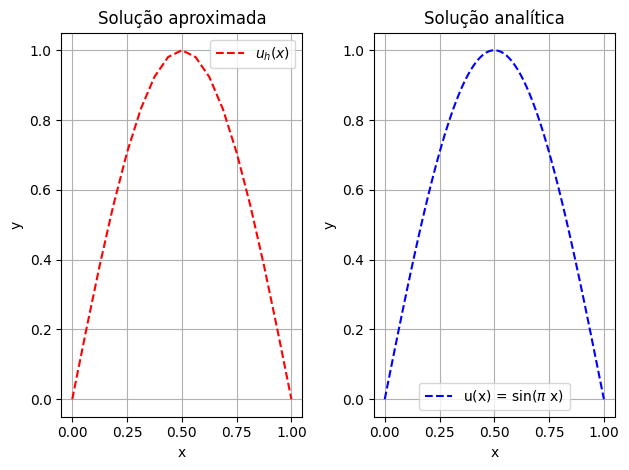

In [6]:
import matplotlib.pyplot as plt


# Generate data using NumPy
# m evenly spaced points between 0 and 1
x1 = np.linspace(0, 1, m)  
# Compute sine values for x

x2 = np.linspace(0, 1, 100)  


#  Solucao aproximada
y1 = c

#  Solucao analitica
# y2 = u


fig, ax = plt.subplots(1, 2)

ax[0].plot(x1, y1, label='$u_h(x)$', color='red', linestyle='--')
ax[1].plot(x2, np.sin(Pi*x2), label='u(x) = sin($\\pi$ x)', color='blue', linestyle='--')

ax[0].set_title('Solução aproximada')
ax[1].set_title('Solução analítica')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].grid()
ax[0].legend()

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].grid()
ax[1].legend()


fig.tight_layout()

plt.show()